In [1]:
print("all ok")

all ok


In [2]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [3]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b",
    temperature=0
)
response = llm.invoke("what is length of wall of china?")

In [4]:
response

AIMessage(content="<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. I think the Chinese government did a survey a while back. I believe it was around 2012, and they measured the wall using more precise methods. I think they found it to be longer than previously thought.\n\nWait, so if the commonly cited number is 13,171 miles, that's about 21,196 kilometers. But I've also heard that some sections ar

In [5]:
response.content

"<think>\nOkay, so I need to figure out the length of the Great Wall of China. I remember hearing that it's really long, but I'm not exactly sure how long. I think it's somewhere in the thousands of kilometers, but I'm not certain. Let me try to break this down.\n\nFirst, I know the Great Wall is a series of fortifications built across several Chinese dynasties. It wasn't built all at once, so maybe that's why the length can vary. I've heard different numbers before, like 13,000 miles or 21,000 kilometers. But I'm not sure which one is accurate.\n\nI should consider the sources of this information. Maybe some people measure it differently. I think the Chinese government did a survey a while back. I believe it was around 2012, and they measured the wall using more precise methods. I think they found it to be longer than previously thought.\n\nWait, so if the commonly cited number is 13,171 miles, that's about 21,196 kilometers. But I've also heard that some sections are overlapping or t

In [6]:
from langchain.tools import tool

## this is my custom tools

In [7]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a: int, b: int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b

@tool
def divide(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

## importing the inbuilt tool

In [8]:
! pip install duckduckgo_search -q

In [9]:
from langchain_community.tools import DuckDuckGoSearchRun
from langgraph.graph import StateGraph,MessagesState,START,END
search = DuckDuckGoSearchRun()

In [10]:
search.invoke("what is the latest update on iphone17 release?")

"Planned for September 2025, the iPhone 17 models could feature larger display sizes, ProMotion across the lineup, Wi-Fi 7, and more. We're still a few months away from the debut of the iPhone 17 ... Well, there have already been indications that Apple is working on yet another iOS 17 release, iOS 17.6.2, so it suggests that the new, second version of iOS 17.6.1 is a very minor update. If it ... This beta release will be available to anyone who wants it via enrollment at beta.apple.com. Like all beta software, iOS 26's public beta is expected to include bugs and performance issues that ... • The iPhone 17's display may not match what the Pro model offers. • iOS 26, Apple's iPhone software update for later this year, got a preview at WWDC. • The iPhone 17 could support a new ... The beta release lets a developer or company test its software program or system to emulate real-world use before a general release. Also: Your CarPlay is getting a major overhaul on iOS 26: 3 new ..."

In [11]:
# !pip install duckduckgo_search


In [12]:
tools=[multiply, add, divide, search]

In [13]:
llm_with_tools=llm.bind_tools(tools)

In [14]:
response=llm_with_tools.invoke("hi")

In [15]:
response.content

'Hello! How can I assist you today?'

In [16]:
response.tool_calls

[]

In [17]:
response=llm_with_tools.invoke("what is 2+2?")

In [18]:
response.content

''

In [19]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': 'asnga17e2',
  'type': 'tool_call'}]

In [20]:
response=llm_with_tools.invoke("what is 10/2?")

In [21]:
response.content

''

In [22]:
response.tool_calls

[{'name': 'divide',
  'args': {'a': 10, 'b': 2},
  'id': 'smwqrntd5',
  'type': 'tool_call'}]

In [23]:
response=llm_with_tools.invoke("what is a current age of the TATA Group?")

In [24]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qq22vye0e', 'function': {'arguments': '{"query":"TATA Group founding year"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 417, 'prompt_tokens': 402, 'total_tokens': 819, 'completion_time': 1.6915202649999999, 'prompt_time': 0.026005332, 'queue_time': 0.052989711, 'total_time': 1.7175255969999998}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--815b9830-8a71-4fbd-8692-1425f7bf4503-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'TATA Group founding year'}, 'id': 'qq22vye0e', 'type': 'tool_call'}], usage_metadata={'input_tokens': 402, 'output_tokens': 417, 'total_tokens': 819})

In [25]:
response.content

''

In [26]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'TATA Group founding year'},
  'id': 'qq22vye0e',
  'type': 'tool_call'}]

In [27]:
# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [28]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."



In [29]:
user_query=["tell me what is 2+2"]

In [30]:
[SYSTEM_PROMPT]+user_query

['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 2+2']

In [31]:
def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }
    
    

In [32]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [33]:
builder=StateGraph(MessagesState)

In [34]:
builder.add_node("llm_decision_step",function_1)

In [35]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000161BF527BA0>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000161BF527C40>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x00000161BF527CE0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [36]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [37]:
builder.add_edge(START,"llm_decision_step")

In [38]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)


In [39]:
builder.add_edge("tools","llm_decision_step")

In [40]:
react_graph=builder.compile()

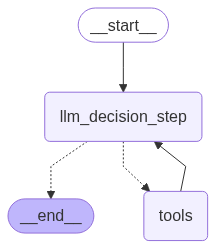

In [41]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [42]:
message=[HumanMessage(content="What is 2 times of narendramodi's age?")]

In [43]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content="What is 2 times of narendramodi's age?", additional_kwargs={}, response_metadata={}, id='fe6b3606-532a-430a-88a0-64872af4d2f6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'gqxsh9zyh', 'function': {'arguments': '{"query":"Narendra Modi age"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 308, 'prompt_tokens': 423, 'total_tokens': 731, 'completion_time': 1.12, 'prompt_time': 0.02819118, 'queue_time': 0.05367889000000001, 'total_time': 1.14819118}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--731436d8-7ba4-44fe-b1c5-9240131ec93c-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Narendra Modi age'}, 'id': 'gqxsh9zyh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 423, 'output_tokens': 308, 'total_tokens': 731}),
  ToolMessage(content="Narendra Mod

In [44]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]

In [45]:
react_graph.invoke({"messages":message})

{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='f297d4a3-68c1-4d0b-9855-70a14ea4ebe2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'vwv9v0qtt', 'function': {'arguments': '{"query":"Elon Musk net worth 2023"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 376, 'prompt_tokens': 427, 'total_tokens': 803, 'completion_time': 1.5817601570000002, 'prompt_time': 0.035119808, 'queue_time': 0.05368891099999999, 'total_time': 1.6168799649999999}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d4970518-c68e-43ba-8eac-259b0432e69c-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth 2023'}, 'id': 'vwv9v0qtt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 427, 'output_tokens': 376, 

In [46]:
message = [HumanMessage(content="What is the speed of light in m/s and multiply it by 10?")]

In [47]:
response  = react_graph.invoke({"messages":message})

In [48]:
response["messages"][-1].content

'The speed of light is approximately 299,792,000 meters per second. When multiplied by 10, the result is 2,997,920,000 meters per second.\n\n**Step-by-Step Explanation:**\n\n1. **Identify the Speed of Light:**\n   - The speed of light in a vacuum is a well-known physical constant.\n   - It is approximately 299,792 kilometers per second.\n\n2. **Convert Kilometers to Meters:**\n   - Since 1 kilometer equals 1,000 meters, multiply the speed in kilometers by 1,000 to convert it to meters.\n   - Calculation: 299,792 km/s × 1,000 = 299,792,000 m/s.\n\n3. **Multiply by 10:**\n   - To find ten times the speed of light in meters per second, multiply the converted speed by 10.\n   - Calculation: 299,792,000 m/s × 10 = 2,997,920,000 m/s.\n\n**Final Answer:**\nThe speed of light is 299,792,000 meters per second, and when multiplied by 10, it equals 2,997,920,000 meters per second.'

In [49]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the speed of light in m/s and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  multiply (tqq8cy97m)
 Call ID: tqq8cy97m
  Args:
    a: 299792000
    b: 10
================================= Tool Message =================================
Name: multiply

2997920000
================================== Ai Message ==================================
Tool Calls:
  multiply (z7tdjza97)
 Call ID: z7tdjza97
  Args:
    a: 299792000
    b: 10
================================= Tool Message =================================
Name: multiply

2997920000
================================== Ai Message ==================================

The speed of light is approximately 299,792,000 meters per second. When multiplied by 10, the result is 2,997,920,000 meters per second.

**Step-by-Step Explanation:**

1. **Identify the Speed of Light:**
   - The speed o

In [50]:
! pip install yfinance -q

In [51]:
import yfinance as yf

In [52]:
@tool
def get_stock_price(ticker:str)->str:
    """
    Fetches the previous closing price of a given stock ticker from Yahoo Finance.

    Args:
        ticker (str): The stock ticker symbol (e.g., 'AAPL', 'TSLA', 'NIFTY.BO').

    Returns:
        str: A message with the stock's previous closing price.
    """
    try:
        stock = yf.Ticker(ticker)
        price = stock.info.get('previousClose')
        if price is None:
            return f"Could not fetch price for ticker '{ticker}'."
        return f"The last closing price of {ticker.upper()} was ${price:.2f}."
    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"
     
    

In [53]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $196.58.'

In [54]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $322.05.'

In [55]:
tools

[StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000161BF527BA0>),
 StructuredTool(name='add', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000161BF527C40>),
 StructuredTool(name='divide', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of division.', args_schema=<class 'langchain_core.utils.pydantic.divide'>, func=<function divide at 0x00000161BF527CE0>),
 DuckDuckGoSearchRun(api_wrapper=DuckDuckGoSearchAPIWrapper(region='wt-wt', safesearch='moderate', time='y', 

In [56]:
tools = [add, multiply, divide, search,get_stock_price]

In [57]:
llm_with_tools = llm.bind_tools(tools)

In [58]:
response = llm_with_tools.invoke("can you give me a latest stock price of adani greens?")

In [59]:
response.content

''

In [60]:
response.tool_calls

[{'name': 'get_stock_price',
  'args': {'ticker': 'ADANIGREEN.NS'},
  'id': 'mck4jdbd2',
  'type': 'tool_call'}]

In [61]:
SYSTEM_PROMPT = SystemMessage(
    content="You are a helpful assistant tasked with using search, the yahoo finance tool and performing arithmetic on a set of inputs."
)

def function_1(state:MessagesState):
    
    user_question=state["messages"]
    
    input_question = [SYSTEM_PROMPT]+user_question
    
    response = llm_with_tools.invoke(input_question)
    
    return {
        "messages":[response]
    }

In [62]:
workflow = StateGraph(MessagesState)
workflow.add_node("llm_decision_step", function_1)
workflow.add_node("tools", ToolNode(tools))
workflow.add_edge(START, "llm_decision_step")
workflow.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)
workflow.add_edge("tools", "llm_decision_step")
react_graph2 = workflow.compile()

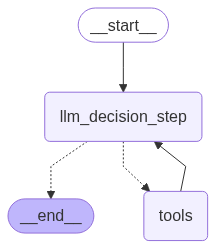

In [63]:
display(Image(react_graph2.get_graph(xray=True).draw_mermaid_png()))

In [64]:
messages = [HumanMessage(content="add 1000 in the current stock price of Apple.")]
messages = react_graph2.invoke({"messages": messages})

In [65]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 1000 in the current stock price of Apple.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (1v9bcthyz)
 Call ID: 1v9bcthyz
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $196.58.
================================== Ai Message ==================================
Tool Calls:
  get_stock_price (zr8aq9y60)
 Call ID: zr8aq9y60
  Args:
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price

The last closing price of AAPL was $196.58.
================================== Ai Message ==================================

The result of adding 1000 to the current stock price of Apple (AAPL) is **1196.58**.


In [66]:
messages = [HumanMessage(content="can you give me 2 times of current stock price of Apple with the latest news of the Apple.")]
messages = react_graph2.invoke({"messages": messages}, {"recursion_limit": 20})

GraphRecursionError: Recursion limit of 20 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [67]:
for m in messages['messages']:
    m.pretty_print()

TypeError: list indices must be integers or slices, not str

In [ ]:
# next class:
# 1. human in loop
# 2. agentic RAG
# 3. multiagent system(collabation and supervisor)
# 4. some mislionoius concept of the langgraph: sub graph, parllal execution etc

In [ ]:
# Assignment:
    
# AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

# • Real-time weather information
# • Top attractions and activities
# • Hotel cost calculation (per day × total days)
# • Currency conversion to user's native currency
# • Complete itinerary generation
# • Total expense calculation
# • generate a summary of the entire output

# user_input
#   |
# search attraction and activity
# 1. search attracation
# 2. search restaurant
# 3. search activity
# 4. search transportation
#   |
# search weather forcasting
# 1. get current weather
# 2. get weather forcast
#   |
# search hotel costs
# 1. search hotel
# 2. estimate the hotel cost
# 3. budget_range
#   |
# calculate total cost
# 1. add
# 2. multiply
# 3. calculated total cost
# 4. calcualte the daily budget
#     | 
# currency_converion
# 1. get exchnage rate
# 2. convert currancy
#     | 
# Itinery generation
# 1. get day plan
# 2. crete full itinery
#     |
# create Trip Summary
#     |
# Retun complete traval plan

# Note: if you know the OOPS then design this entire system using object and class in modular fashion.